# 使用Python进行数据可视化分析

## 连接MySQL并获取数据

In [1]:
import pandas
import pymysql

connection = pymysql.connect('192.168.211.128', 'hive', 'hive', 'dblab')
national = pandas.read_sql('SELECT * FROM national;', connection)
national.set_index('id', inplace=True)

In [2]:
gender_counter = national[['gender', 'count']]
print(gender_counter)

        gender count
id                  
1            F  7065
2            F  2604
3            F  2003
4            F  1939
5            F  1746
...        ...   ...
1825429      M     5
1825430      M     5
1825431      M     5
1825432      M     5
1825433      M     5

[1825433 rows x 2 columns]


In [3]:
# 由于数据量庞大，使用pandas聚合函数进行分组聚合会消耗大量时间，因此选择通过SQL语句进行数据提取
gender_counter = pandas.read_sql(
    'SELECT `gender`, SUM(`count`) as `count` FROM `national` GROUP BY `gender`;',
    connection,
    index_col='gender'
)
print(gender_counter)

              count
gender             
F       167070477.0
M       170064949.0


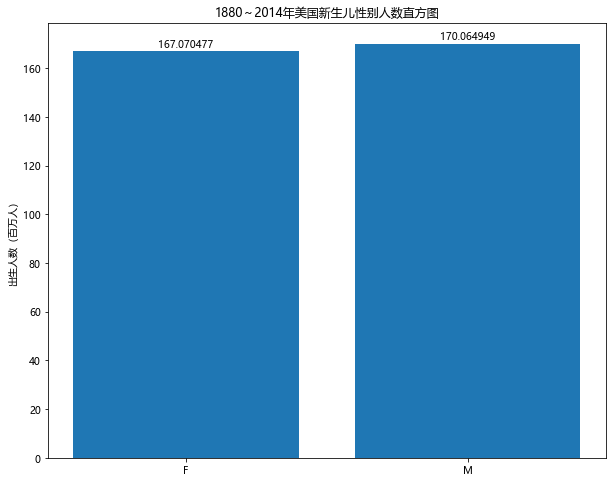

In [4]:
from matplotlib import pyplot
%matplotlib inline
pyplot.rcParams['font.serif'] = '新宋体'
pyplot.rcParams['font.sans-serif'] = 'Microsoft YaHei'
pyplot.rcParams['font.monospace'] = 'Consolas'
pyplot.rcParams['axes.unicode_minus'] = False
pyplot.figure(figsize=(10, 8))
pyplot.bar(gender_counter.index, gender_counter['count'] / 1e6)
for (x, y) in zip(gender_counter.index, gender_counter['count'] / 1e6):
    pyplot.text(x, y + 0.2, str(y), ha='center', va='bottom', fontsize=10)
pyplot.ylabel('出生人数（百万人）')
pyplot.title('1880～2014年美国新生儿性别人数直方图')
pyplot.savefig('./Gender_Hist.svg')
pyplot.show()

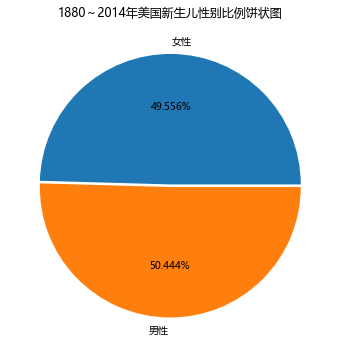

In [5]:
pyplot.figure(figsize=(10, 6))
pyplot.pie(gender_counter['count'], explode=(0.01,) * 2, labels=('女性', '男性'), autopct='%1.3f%%')
pyplot.title('1880～2014年美国新生儿性别比例饼状图')
pyplot.savefig('./Gender_Pie.svg')

In [6]:
name_count = pandas.read_sql(
    'SELECT `name`, SUM(`count`) AS `count` FROM `national` GROUP BY `name` ORDER BY `count` DESC;',
    connection
)
name_count.index = range(1, name_count.shape[0] + 1)
print(name_count)

              name      count
1            James  5129096.0
2             John  5106590.0
3           Robert  4816785.0
4          Michael  4330805.0
5             Mary  4130441.0
...            ...        ...
93885       Stancy        5.0
93886      Jonilee        5.0
93887         Iean        5.0
93888      Shaikha        5.0
93889  Davidjoseph        5.0

[93889 rows x 2 columns]


In [7]:
import numpy
others_count = pandas.DataFrame(
    {'name': 'Others', 'count': numpy.sum(name_count.loc[10:, 'count'].to_numpy())},
    index=[1]
)
name_count = name_count.loc[:10, :]
name_count= pandas.concat([name_count, others_count], ignore_index=True)
name_count.index = range(1, name_count.shape[0] + 1)
print(name_count)

       name        count
1     James    5129096.0
2      John    5106590.0
3    Robert    4816785.0
4   Michael    4330805.0
5      Mary    4130441.0
6   William    4071368.0
7     David    3590557.0
8    Joseph    2580687.0
9   Richard    2564867.0
10  Charles    2376700.0
11   Others  300814230.0


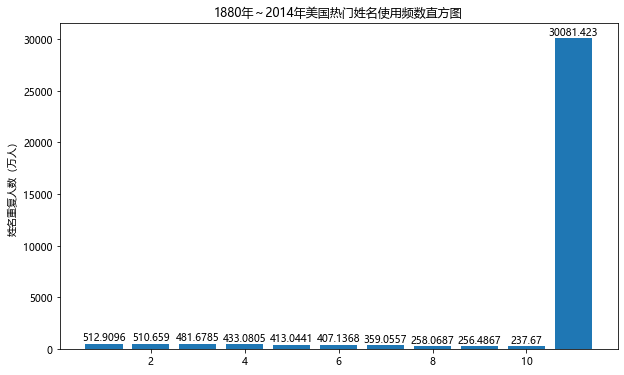

In [8]:
pyplot.figure(figsize=(10, 6))
pyplot.bar(name_count.index, name_count['count'] / 1e4)
for (x, y) in zip(name_count.index, name_count['count'] / 1e4):
    pyplot.text(x, y + 10, str(y), ha='center', va='bottom', fontsize=10)
pyplot.ylabel('姓名重复人数（万人）')
pyplot.title('1880年～2014年美国热门姓名使用频数直方图')
pyplot.savefig('./Name_Hist.svg')